STARTING WITH ANALYTICS

In [3]:
import pandas as pd
eixample_2023= pd.read_csv("./data/df_eixample_pivoted.csv", low_memory=False)

In [2]:
eixample_2023.head()

,CODI EOI,NOM ESTACIO,DATA,Hora,TIPUS ESTACIO,AREA URBANA,CODI INE,MUNICIPI,CODI COMARCA,NOM COMARCA,...,LATITUD,LONGITUD,Georeferència,CO,NO,NO2,NOX,O3,PM10,SO2
0,8019043,Barcelona (Eixample),2023-01-01,01h,traffic,urban,8019,Barcelona,13,Barcelonès,...,41.385315,2.1538,POINT (2.1537998 41.385315),0.9,NaN,NaN,NaN,1.0,80.0,2.0
1,8019043,Barcelona (Eixample),2023-01-01,02h,traffic,urban,8019,Barcelona,13,Barcelonès,...,41.385315,2.1538,POINT (2.1537998 41.385315),0.3,NaN,NaN,NaN,1.0,76.0,1.0
2,8019043,Barcelona (Eixample),2023-01-01,03h,traffic,urban,8019,Barcelona,13,Barcelonès,...,41.385315,2.1538,POINT (2.1537998 41.385315),0.2,NaN,NaN,NaN,1.0,59.0,1.0
3,8019043,Barcelona (Eixample),2023-01-01,04h,traffic,urban,8019,Barcelona,13,Barcelonès,...,41.385315,2.1538,POINT (2.1537998 41.385315),0.2,NaN,NaN,NaN,1.0,43.0,1.0
4,8019043,Barcelona (Eixample),2023-01-01,05h,traffic,urban,8019,Barcelona,13,Barcelonès,...,41.385315,2.1538,POINT (2.1537998 41.385315),0.2,NaN,NaN,NaN,1.0,37.0,1.0


In [3]:
def na_values_per_column(eixample_2023): # Conteo de valores NA por columna
    na_values = eixample_2023.isna().sum()

    #print("Conteo de valores NA por columna:")
    return na_values

In [5]:
print(na_values_per_column(eixample_2023))
print('eixample_2023.shape = ',eixample_2023.shape)

CODI EOI           0
NOM ESTACIO        0
DATA               0
Hora               0
TIPUS ESTACIO      0
AREA URBANA        0
CODI INE           0
MUNICIPI           0
CODI COMARCA       0
NOM COMARCA        0
ALTITUD            0
LATITUD            0
LONGITUD           0
Georeferència      0
CO                 1
NO                63
NO2               63
NOX               63
O3                 1
PM10             778
SO2                3
dtype: int64
eixample_2023.shape =  (1715, 21)


In [7]:
!pip install --upgrade seaborn

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.1.4 requires pyqt5<5.13; python_version >= "3", which is not installed.
spyder 4.1.4 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.
lenskit 0.14.2 requires pandas==1.*,>=1.0, but you have pandas 2.0.3 which is incompatible.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



   --------------------------------------- 294.9/294.9 kB 74.4 kB/s eta 0:00:00
   ---------------------------------------- 10.8/10.8 MB 198.5 kB/s eta 0:00:00
   -------------------------------------- 229.9/229.9 kB 163.4 kB/s eta 0:00:00
   -------------------------------------- 345.4/345.4 kB 446.8 kB/s eta 0:00:00
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.1
    Uninstalling python-dateutil-2.8.1:
      Successfully uninstalled python-dateutil-2.8.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1


<ipython-input-4-e3e0e04c06dd>:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(eixample_2023['PM10'], bins=30, kde=True)


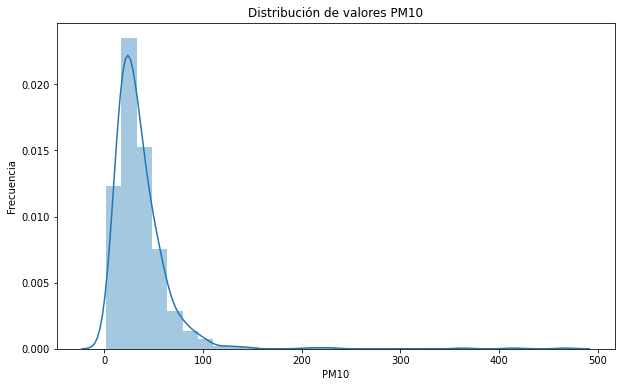

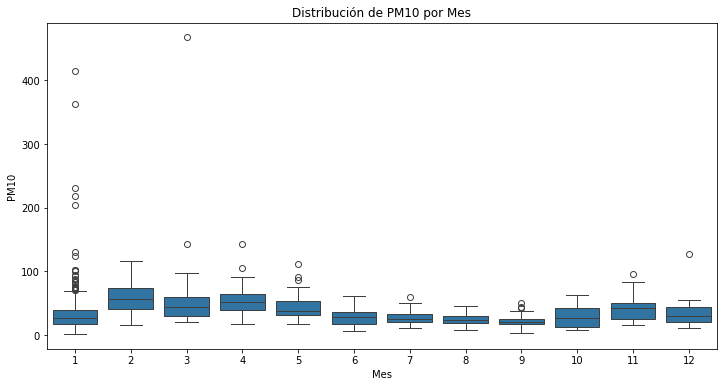

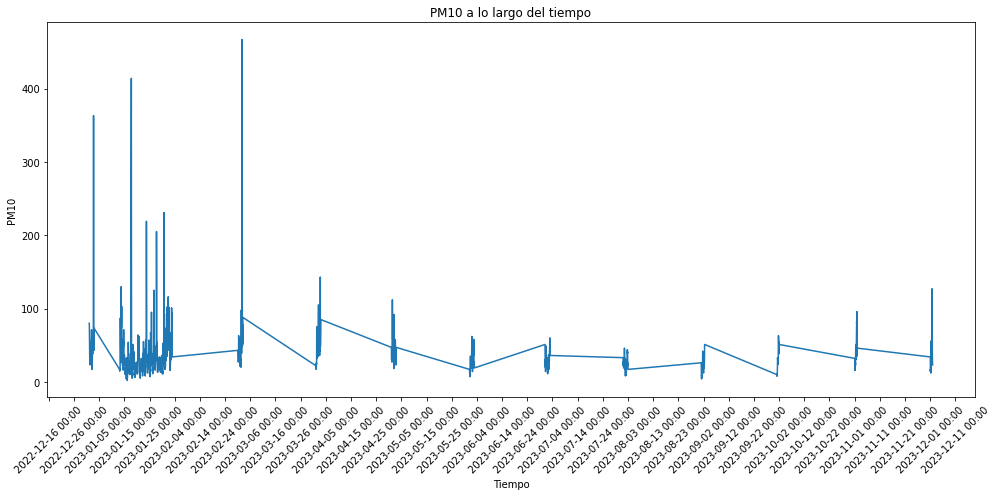

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Supongamos que 'eixample_2023' es tu DataFrame y que tiene las columnas 'DATA', 'Hora' y 'PM10'
# Asegúrate de que la columna 'DATA' y 'Hora' están en el formato correcto

eixample_2023['DATA'] = pd.to_datetime(eixample_2023['DATA'])

# Si tu columna 'Hora' ya contiene información de tiempo en formato reconocible,
# no necesitas añadir ":00:00" al final. Solo conviértela directamente a timedelta.
eixample_2023['Hora'] = pd.to_timedelta(eixample_2023['Hora'].astype(str))

# Si 'Hora' ya está en un formato de duración reconocible o si contiene solo horas,
# la conversión directa con pd.to_timedelta debería funcionar correctamente.

# Crea una nueva columna 'Timestamp' combinando 'DATA' y 'Hora'
eixample_2023['Timestamp'] = eixample_2023['DATA'] + eixample_2023['Hora']

# Ahora puedes visualizar la distribución de los valores PM10 a lo largo del tiempo

# Histograma de PM10


plt.figure(figsize=(10, 6))
sns.distplot(eixample_2023['PM10'], bins=30, kde=True)
plt.title('Distribución de valores PM10')
plt.xlabel('PM10')
plt.ylabel('Frecuencia')

# Boxplot de PM10 a lo largo del tiempo (opcionalmente agrupado por meses/años)
# Esto puede ser útil para ver la variabilidad de PM10 en diferentes períodos
eixample_2023['Mes'] = eixample_2023['Timestamp'].dt.month  # Agrega una columna de mes si quieres agrupar por mes
plt.figure(figsize=(12, 6))
sns.boxplot(data=eixample_2023, x='Mes', y='PM10')
plt.title('Distribución de PM10 por Mes')
plt.xlabel('Mes')
plt.ylabel('PM10')
plt.show()

# Time series plot de PM10
# Gráfico de serie temporal de PM10
plt.figure(figsize=(14, 7))
sns.lineplot(data=eixample_2023, x='Timestamp', y='PM10')

# Formateador para el eje x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Ajusta el intervalo según necesites

plt.title('PM10 a lo largo del tiempo')
plt.xlabel('Tiempo')
plt.ylabel('PM10')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [5]:
def parameter_plots(parameter):
    # Histograma de PM10
    plt.figure(figsize=(10, 6))
    sns.distplot(eixample_2023[parameter], bins=30, kde=True)
    plt.title('Distribución de valores PM10')
    plt.xlabel(parameter)
    plt.ylabel('Frecuencia')

    # Boxplot de PM10 a lo largo del tiempo (opcionalmente agrupado por meses/años)
    # Esto puede ser útil para ver la variabilidad de PM10 en diferentes períodos
    eixample_2023['Mes'] = eixample_2023['Timestamp'].dt.month  # Agrega una columna de mes si quieres agrupar por mes
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=eixample_2023, x='Mes', y='PM10')
    plt.title(f'Distribución de {parameter} por Mes')
    plt.xlabel('Mes')
    plt.ylabel(parameter)
    plt.show()

    # Time series plot de PM10
    # Gráfico de serie temporal de PM10
    plt.figure(figsize=(14, 7))
    sns.scatterplot(data=eixample_2023, x='Timestamp', y=parameter)

    # Formateador para el eje x
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Ajusta el intervalo según necesites

    plt.title(f'{parameter} a lo largo del tiempo')
    plt.xlabel('Tiempo')
    plt.ylabel(parameter)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<ipython-input-5-034b1e53c888>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(eixample_2023[parameter], bins=30, kde=True)


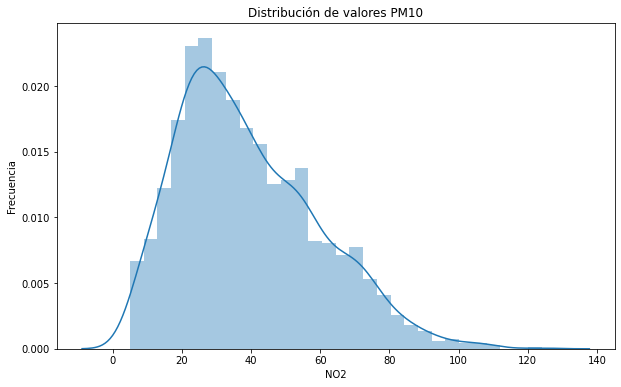

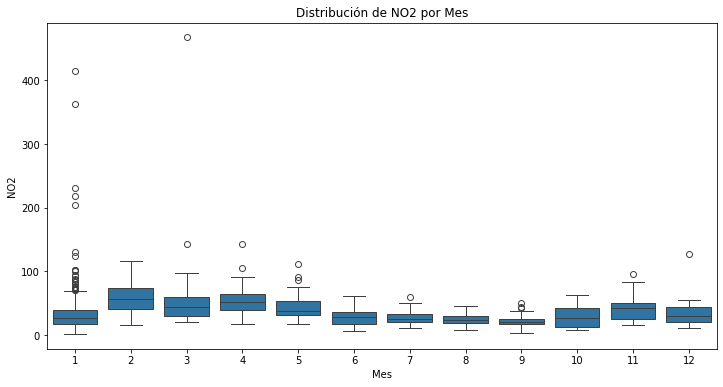

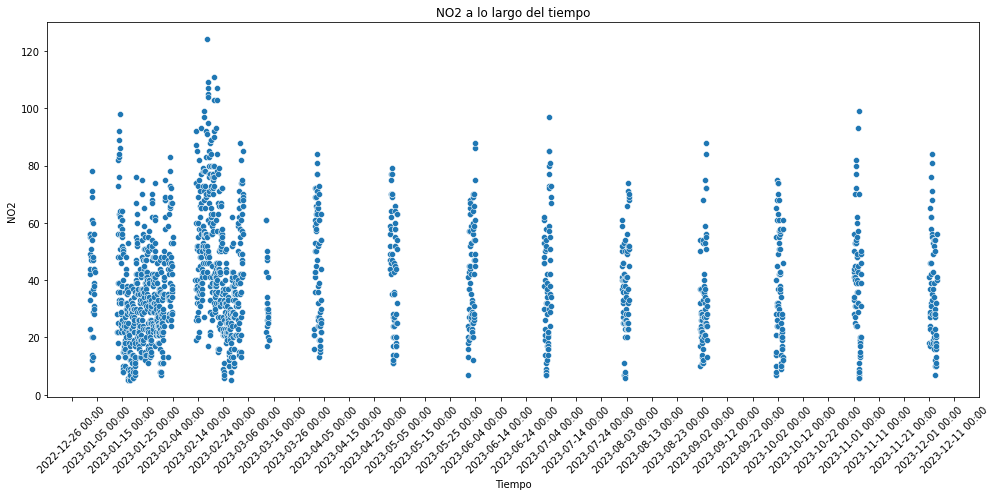

In [6]:
parameter_plots('NO2')

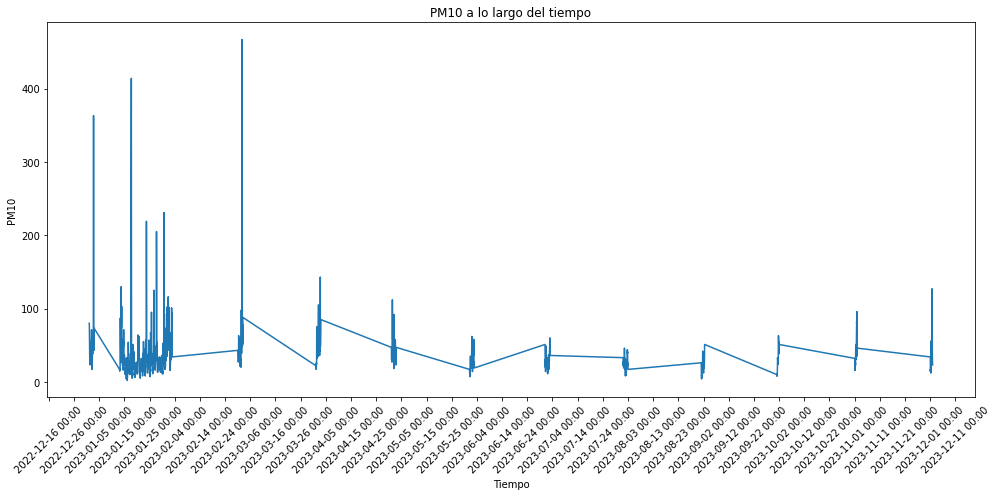

In [18]:

import matplotlib.dates as mdates


# Asumiendo que 'eixample_2023' es tu DataFrame y ya tiene una columna 'Timestamp'
# para las marcas de tiempo combinadas de fecha y hora

# Gráfico de serie temporal de PM10
plt.figure(figsize=(14, 7))
sns.lineplot(data=eixample_2023, x='Timestamp', y='PM10')

# Formateador para el eje x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Ajusta el intervalo según necesites

plt.title('PM10 a lo largo del tiempo')
plt.xlabel('Tiempo')
plt.ylabel('PM10')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
